<a href="https://colab.research.google.com/github/saian65/Neural-Networks/blob/common/PyTorch_SinNet_2%5Ex_sin(2%5E_x).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

учебная нейронка восстанавливающая график синуса

In [116]:
import torch
import matplotlib.pyplot as plt

In [117]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)

In [131]:
import numpy as np

def target_func(x):
    left = 2**x_train
    right = np.sin(2**(-x))
    return left*right

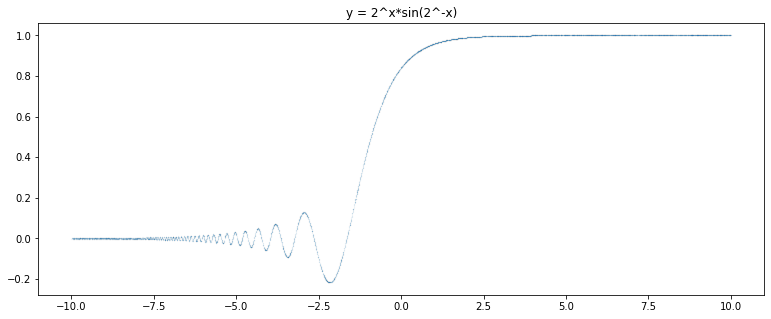

In [143]:
#make train dataset
x_train = torch.rand(10000)
x_train = x_train * 20.0 - 10.0

y_train = target_func(x_train)

plt.plot(x_train.numpy(), y_train.numpy(), ".", ms=0.05)
plt.title('y = 2^x*sin(2^-x)');

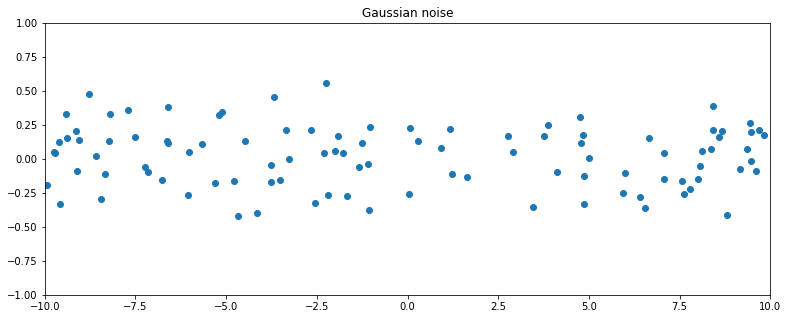

In [119]:
#add noise from normal distribution
noise = torch.randn(y_train.shape) / 5.

plt.plot(x_train.numpy(), noise.numpy(), 'o')
plt.axis([-10, 10, -1, 1])
plt.title('Gaussian noise');

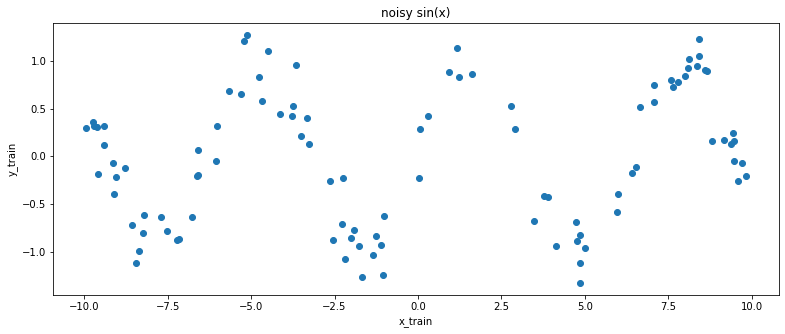

In [120]:
#КОНЕЧНАЯ обучающая выборка
y_train = y_train + noise
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('noisy sin(x)')
plt.xlabel('x_train')
plt.ylabel('y_train');

In [121]:
x_train.unsqueeze_(1)
y_train.unsqueeze_(1);

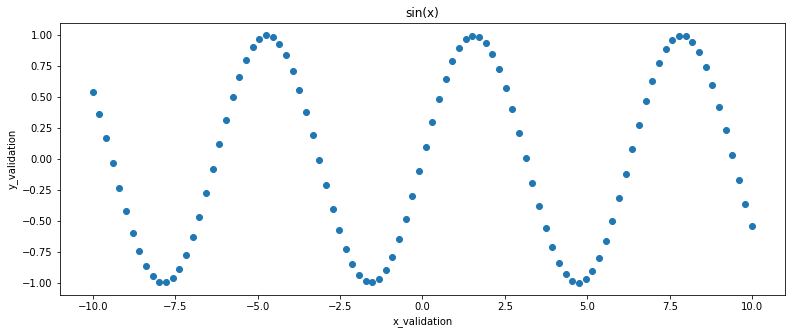

In [122]:
# validation dataset
x_validation = torch.linspace(-10, 10, 100)
y_validation = torch.sin(x_validation.data)
plt.plot(x_validation.numpy(), y_validation.numpy(), 'o')
plt.title('sin(x)')
plt.xlabel('x_validation')
plt.ylabel('y_validation');

In [123]:
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1);

In [124]:
class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(SineNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

In [125]:
sine_net = SineNet(50)

In [126]:
def predict(net, x, y):
    y_pred = net.forward(x)

    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')

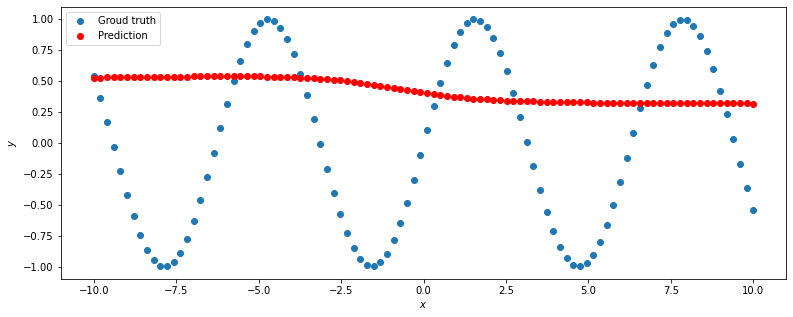

In [127]:
predict(sine_net, x_validation, y_validation)
#weights was random

now let's find min of func loss

In [128]:
optimizer = torch.optim.Adam(sine_net.parameters(), lr=0.01)

In [129]:
def loss_RMSE(pred, target):
    squares = (pred - target) ** 2
    return squares.mean()

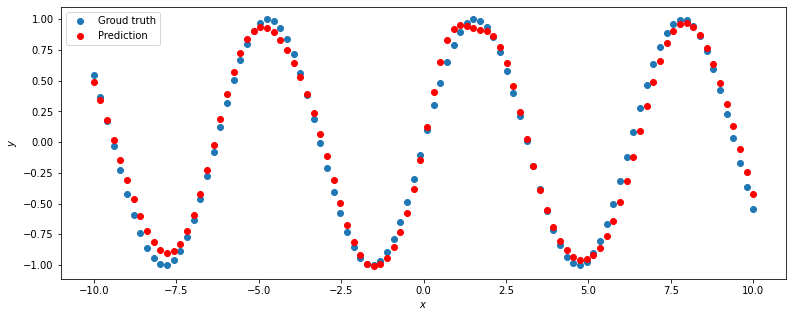

In [130]:
for epoch_index in range(2000):
    optimizer.zero_grad()

    y_pred = sine_net.forward(x_train)
    loss_val = loss_RMSE(y_pred, y_train)

    loss_val.backward()

    optimizer.step()

predict(sine_net, x_validation, y_validation)